# Zipline Integration Sample
* Loading custom data for backtesting: https://pythonprogramming.net/custom-data-zipline-local-python-programming-for-finance/
* Active Symbols for Day Trading: https://www.thebalance.com/most-popular-stocks-and-etfs-for-day-trading-1031371

In [20]:
from collections import OrderedDict
from datetime import datetime
import pytz

import pandas as pd
import matplotlib.pyplot as plt

import zipline
from zipline.api import symbol, record, order, order_target_percent, attach_pipeline, pipeline_output
from zipline.pipeline import Pipeline
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.factors import MovingAverageConvergenceDivergenceSignal, ExponentialWeightedMovingAverage
from zipline.pipeline.filters import SingleAsset, StaticAssets

In [2]:
%load_ext zipline

## Helper Function to Ingest Custom CSV/Pandas Data

In [2]:
def get_custom_data(filepath, symbol, data_frequency, has_adj_close):
    """
    Helper function to prepare data panel to feed into zipline algorithm
    """
    data = OrderedDict()
    data[symbol] = pd.read_csv(filepath, index_col='date', parse_dates=True)
    
    # If need to quickly handle mismatched calendar days
    if data_frequency == 'daily':
        data[symbol] = data[symbol].resample('1d').mean()
        data[symbol].fillna(method='ffill', inplace=True)
    elif data_frequency == 'minute':
        data[symbol] = data[symbol].resample('1T').mean()
        data[symbol].fillna(method='ffill', inplace=True)
    
    base_attributes = ['open', 'high', 'low', 'close', 'volume']
    if has_adj_close:
        base_attributes.append('adj close')
    panel = pd.Panel(data)
    panel.minor_axis = base_attributes
    panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
    return panel

## Simple Zipline Scenario

In [43]:
# %%zipline --start 2018-1-1 --end 2019-10-31 --bundle tomcsv --capital-base 10000
# from zipline.api import symbol, order, record
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))
    
aapl = zipline.run_algorithm(
    start=datetime(2018, 1, 1, 0, 0, 0, 0, pytz.utc),
    end=datetime(2019, 10, 30, 0, 0, 0, 0, pytz.utc),
    initialize=initialize,
    capital_base=10000,
    handle_data=handle_data,
    data=get_custom_data('data/daily/AAPL.csv', 'AAPL', data_frequency='daily', has_adj_close=True)
)

C:\Users\tommy.yong\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  app.launch_new_instance()


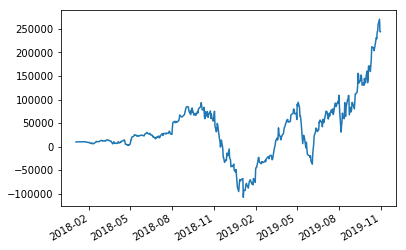

In [44]:
aapl['portfolio_value'].plot();

## Dual Moving Average Crossover

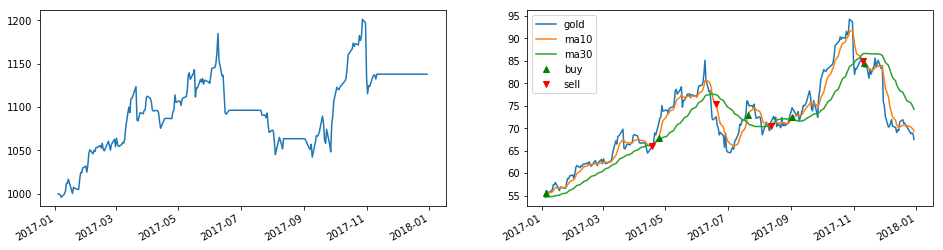

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-03 21:00:00+00:00,NaN,0.000000,NaN,0.007650,NaN,NaN,0.000000,1000.000000,0.00,0.00,...,0.0,0.0,0,NaN,1000.000000,0.00,0.00,1,[],0.0
2017-01-04 21:00:00+00:00,0.002931,-0.000261,-0.295992,0.013645,0.019091,0.153539,-504.531135,495.468865,504.27,504.27,...,0.0,0.0,0,-11.224972,1000.000000,0.00,0.00,2,"[{'sid': Equity(64 [AEIS]), 'amount': 9, 'pric...",0.0
2017-01-05 21:00:00+00:00,0.006565,-0.001071,-0.188754,0.012839,0.070897,0.091819,0.000000,495.468865,503.46,503.46,...,0.0,0.0,0,-11.534803,495.468865,504.27,504.27,3,[],0.0
2017-01-06 21:00:00+00:00,0.020753,-0.003951,-0.376598,0.016463,0.058146,0.123505,0.000000,495.468865,500.58,500.58,...,0.0,0.0,0,-10.441108,495.468865,503.46,503.46,4,[],0.0
2017-01-09 21:00:00+00:00,0.037857,-0.000261,0.166330,0.013108,0.072753,-0.271373,0.000000,495.468865,504.27,504.27,...,0.0,0.0,0,-0.589922,495.468865,500.58,500.58,5,[],0.0
2017-01-10 21:00:00+00:00,0.037737,0.002259,0.269318,0.013108,0.067245,-0.316587,0.000000,495.468865,506.79,506.79,...,0.0,0.0,0,4.895613,495.468865,504.27,504.27,6,[],0.0
2017-01-11 21:00:00+00:00,0.066597,0.012159,0.584499,0.015971,0.061509,-0.256953,0.000000,495.468865,516.69,516.69,...,0.0,0.0,0,24.247532,495.468865,506.79,506.79,7,[],0.0
2017-01-12 21:00:00+00:00,0.062585,0.011979,0.435114,0.013421,0.062955,-0.137517,0.000000,495.468865,516.51,516.51,...,0.0,0.0,0,22.310459,495.468865,516.69,516.69,8,[],0.0
2017-01-13 21:00:00+00:00,0.061238,0.016929,0.524924,0.015747,0.058980,-0.120126,0.000000,495.468865,521.46,521.46,...,0.0,0.0,0,29.629506,495.468865,516.51,516.51,9,[],0.0
2017-01-17 21:00:00+00:00,0.107523,0.000459,-0.147171,0.012168,0.061573,0.534634,0.000000,495.468865,504.99,504.99,...,0.0,0.0,0,0.203041,495.468865,521.46,521.46,10,[],0.0


In [200]:
%%zipline --start 2017-1-1 --end 2018-1-1 --capital-base 1000
from zipline.api import sid, order_target_percent, record
import matplotlib.pyplot as plt
def initialize(context):
    context.i = 0
    context.gold = sid(64)

def handle_data(context, data):
    context.i += 30
    if context.i < 30:
        return
    
    ma10 = data.history(context.gold, 'price', bar_count=10, frequency='1d').ewm(span=10).mean().iloc[-1]
    ma30 = data.history(context.gold, 'price', bar_count=30, frequency='1d').mean()
    
    if ma10 > ma30:
        if data.can_trade(context.gold):
            order_target_percent(context.gold, 0.5)
    elif ma10 < ma30:
        if data.can_trade(context.gold):
            order_target_percent(context.gold, 0)
        
    record(
        gold=data.current(context.gold, 'price'),
        ma10=ma10,
        ma30=ma30
    )

def analyze(context, perf):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    perf['portfolio_value'].plot(ax=ax[0])
    perf[['gold', 'ma10', 'ma30']].plot(ax=ax[1])
    
    transactions = perf[perf['transactions'].apply(lambda x: x != [])]['transactions']
    longs_indices = transactions[transactions.apply(lambda x: x[0]['amount'] > 1)].index
    shorts_indices = transactions[transactions.apply(lambda x: x[0]['amount'] < -1)].index
    ax[1].plot(longs_indices, perf['ma10'][longs_indices], '^', color='g', label='buy')
    ax[1].plot(shorts_indices, perf['ma10'][shorts_indices], 'v', color='r', label='sell')
    plt.legend()
    plt.show()

In [193]:
gold = _

Long Returns: 0.23138686131386854/2
Trade Returns: 0.16192250999999902


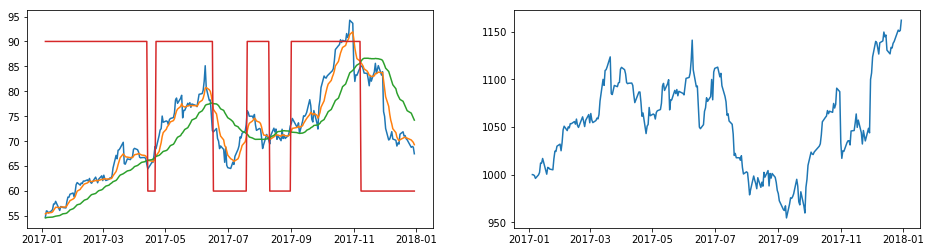

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(gold[['gold', 'ma10', 'ma30', 'posn']]);
ax[1].plot(gold['portfolio_value']);
print('Long Returns: {}/2'.format(gold['gold'].iloc[-1] / gold['gold'].iloc[0] - 1))
print('Trade Returns: {}'.format(gold['portfolio_value'].iloc[-1] / gold['portfolio_value'].iloc[0] - 1))

## MACD
TODO

### Custom Dataset

In [89]:
def initialize(context):
    context.asset = symbol('VXX')

def handle_data(context, data):
    record(VXX=data.current(context.asset, 'price'), freq='1d')


data = get_custom_data('data/minute/VXX.csv', 'VXX', data_frequency='minute', has_adj_close=False)
vxx = zipline.run_algorithm(
    start=data.major_axis.min(),
    end=data.major_axis.max(),
    initialize=initialize,
    capital_base=10000,
    handle_data=handle_data,
    data=data,
    data_frequency='minute',
    trading_calendar=AlwaysOpenCalendar()
)

C:\Users\tommy.yong\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  import sys
C:\Users\tommy.yong\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Users\tommy.yong\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


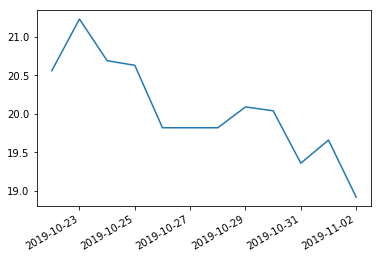

In [90]:
vxx['VXX'].plot();

### Using Default Quandl Dataset

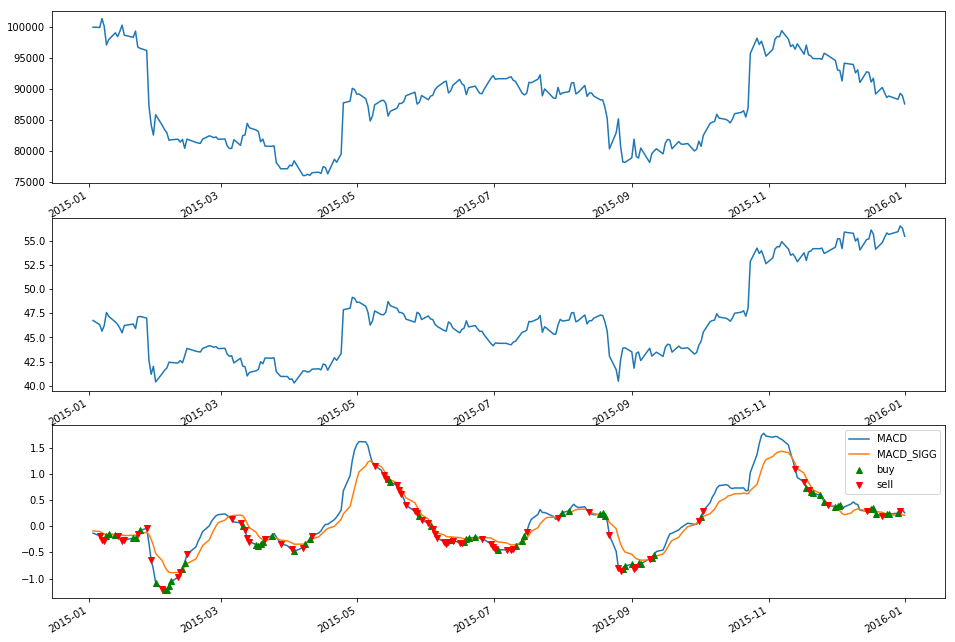

In [51]:
def initialize(context):
    context.asset = symbol('MSFT')
    
    
def handle_data(context, data):
    macd_12 = data.history(context.asset, 'price', 30, '1d').ewm(span=12).mean()
    macd_26 = data.history(context.asset, 'price', 30, '1d').ewm(span=26).mean()
    macd = macd_12 - macd_26
    macd_sig = macd.ewm(span=9).mean()
    record(MSFT=data.current(context.asset, 'price'))
    record(MACD=macd.iloc[-1])
    record(MACD_SIG=macd_sig.iloc[-1])
    
    if macd.iloc[-1] > macd_sig.iloc[-1] and data.can_trade(context.asset):
        order_target_percent(context.asset, 1)
    elif macd.iloc[-1] < macd_sig.iloc[-1] and data.can_trade(context.asset):
        order_target_percent(context.asset, -1)
    else:
        order_target_percent(context.asset, 0)


def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, figsize=(16, 12))
    perf['portfolio_value'].plot(ax=ax[0])
    perf['MSFT'].plot(ax=ax[1])
    perf[['MACD', 'MACD_SIG']].plot(ax=ax[2])
    
    transactions = perf[perf['transactions'].apply(lambda x: x != [])]['transactions']
    longs_indices = transactions[transactions.apply(lambda x: x[0]['amount'] > 1)].index
    shorts_indices = transactions[transactions.apply(lambda x: x[0]['amount'] < -1)].index
    ax[2].plot(longs_indices, perf['MACD'][longs_indices], '^', color='g', label='buy')
    ax[2].plot(shorts_indices, perf['MACD'][shorts_indices], 'v', color='r', label='sell')
    plt.legend()
    plt.show()
    

msft = zipline.run_algorithm(
    start=datetime(2015, 1, 1, 0, 0, 0, 0, pytz.utc),
    end=datetime(2016, 1, 1, 0, 0, 0, 0, pytz.utc),
    initialize=initialize,
    capital_base=100000,
    handle_data=handle_data,
    analyze=analyze
)